# Evoluzione dei Casi e Decessi da COVID-19 a Livello Globale dal 2020 al 2021

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'pandas'

In [ ]:

import pandas as pd


data_path = "/kaggle/input/covid19-dataset/owid-covid-data.csv"

# Caricamento del dataset CSV in un DataFrame
df = pd.read_csv(data_path)


print("Prime righe del dataset (df.head()):")
print(df.head())  


print("\nShape del dataset:", df.shape) 


print("\nStatistiche descrittive del dataset:")
print(df.describe()) 


print("\nVerifica valori nulli:")
print(df.isnull().sum())  


Prime righe del dataset (df.head()):
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0 

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  1.632930e+05  1.631330e+05        1.611500e+05  1.454510e+05   
mean   2.536044e+06  1.157084e+04        1.156560e+04  5.766407e+04   
std    1.543441e+07  8.442598e+04        8.257830e+04  3.021145e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    2.001000e+03  1.000000e+00        7.000000e+00  7.900000e+01   
50%    2.611700e+04  7.900000e+01        1.071430e+02  7.830000e+02   
75%    2.987020e+05  1.063000e+03        1.146000e+03  7.307000e+03   
max    4.451295e+08  4.206334e+06        3.444237e+06  5.995245e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  145487.000000        143390.000000            162535.000000   
mean      171.137304           172.673031             29447.756785   
std       832.251328           817.024076             51852.379656   
min         0.000000             0.000000                 0.001000   
25%       

In [ ]:
# Selezione delle colonne rilevanti dal dataset
df_selected = df[['iso_code', 'continent', 'location', 'date', 'total_cases', 'total_deaths']]

# Visualizzazione del dataframe selezionato
print("Visualizzazione del DataFrame selezionato:")
display(df_selected)  

print("\nVerifica dei valori nulli nel DataFrame selezionato:")
print(df_selected.isnull().sum())  



Visualizzazione del DataFrame selezionato:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,iso_code,continent,location,date,total_cases,total_deaths
0,AFG,Asia,Afghanistan,2020-02-24,5.0,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,NaN
...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,5395.0
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,5396.0
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,5396.0
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,5397.0



Verifica dei valori nulli nel DataFrame selezionato:
iso_code            0
continent        9956
location            0
date                0
total_cases      3033
total_deaths    20875
dtype: int64


In [ ]:
# Verifica dei valori nulli nel DataFrame completo
print("Verifica dei valori nulli in tutto il DataFrame:")
print(df.isnull().sum())  

 

Verifica dei valori nulli in tutto il DataFrame:
iso_code                                        0
continent                                    9956
location                                        0
date                                            0
total_cases                                  3033
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 67, dtype: int64


In [ ]:
# Recupero e visualizzazione dei nomi delle colonne del DataFrame
print("Nomi delle colonne nel DataFrame:")
columns_list = df.columns.tolist() 
columns_list  


Nomi delle colonne nel DataFrame:


['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [ ]:
# Raggruppamento dei dati per data e somma dei casi totali e dei decessi totali
df_global = df.groupby('date')[['total_cases', 'total_deaths']].sum()

# Visualizzazione delle ultime righe del DataFrame raggruppato per data
print("Ultime righe del DataFrame globale (raggruppato per data):")
print(df_global.tail())  # Mostra le ultime 5 righe del DataFrame globale


Ultime righe del DataFrame globale (raggruppato per data):
             total_cases  total_deaths
date                                  
2022-03-01  1.863070e+09    24871634.0
2022-03-02  1.870215e+09    24905256.0
2022-03-03  1.878458e+09    24940774.0
2022-03-04  1.885818e+09    24977574.0
2022-03-05  1.891678e+09    25000341.0


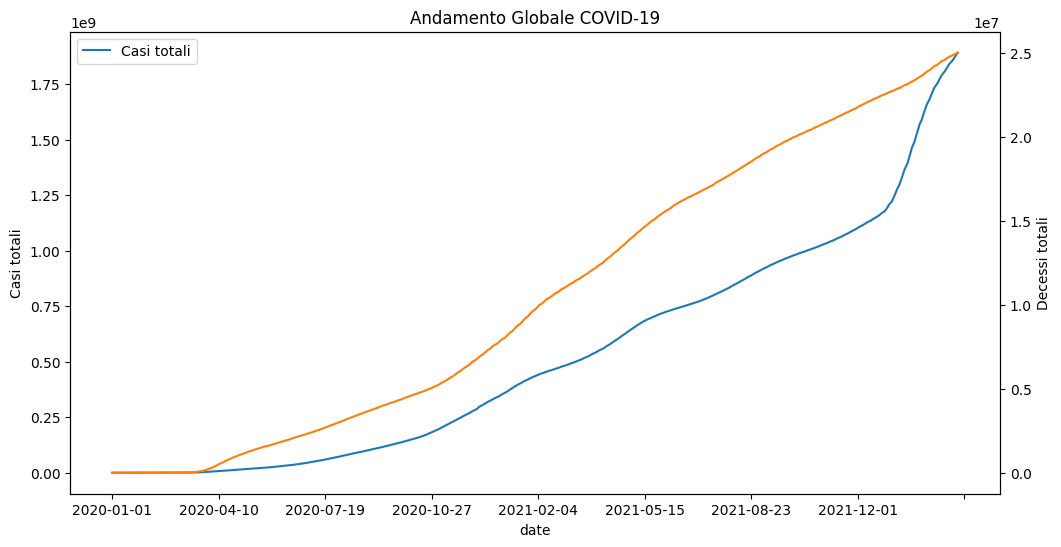

In [ ]:
# Creazione del grafico per l'andamento globale di COVID-19
# Il grafico visualizzerà i 'total_cases' sull'asse primario e 'total_deaths' sull'asse secondario
ax = df_global.plot(figsize=(12,6), secondary_y='total_deaths', title="Andamento Globale COVID-19")

ax.set_ylabel('Casi totali')
ax.right_ax.set_ylabel('Decessi totali')
ax.legend(['Casi totali', 'Decessi totali'])

plt.show()



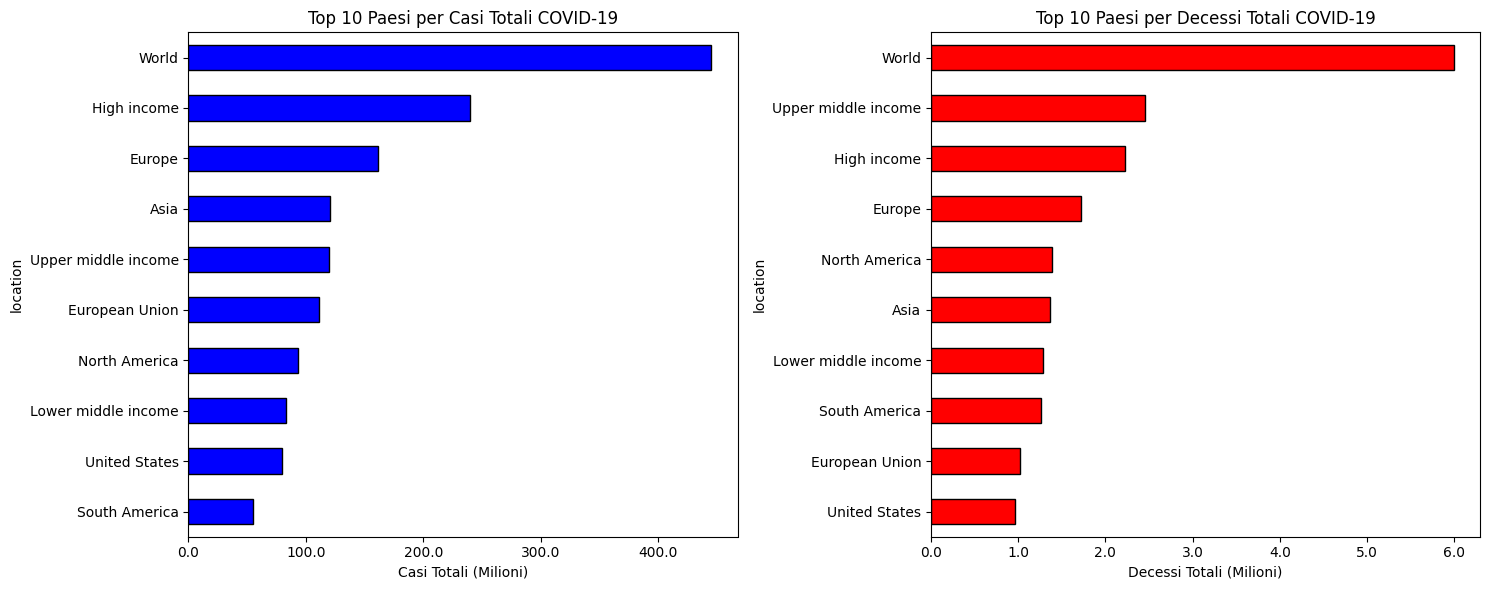

In [ ]:
import matplotlib.pyplot as plt

# Raggruppare i dati per Paese e selezionare i valori massimi per ogni Paese (casi totali e decessi totali)
df_top = df.groupby('location')[['total_cases', 'total_deaths']].max()

# Selezionare i 10 Paesi con il maggior numero di casi e decessi
top_cases = df_top.nlargest(10, 'total_cases')  # Top 10 per casi totali
top_deaths = df_top.nlargest(10, 'total_deaths')  # Top 10 per decessi totali

top_cases['total_cases'] /= 1e6
top_deaths['total_deaths'] /= 1e6

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

top_cases['total_cases'].plot(kind='barh', ax=axes[0], color='blue', edgecolor='black')
axes[0].set_title("Top 10 Paesi per Casi Totali COVID-19")  # Titolo del grafico
axes[0].set_xlabel("Casi Totali (Milioni)")  # Etichetta dell'asse X
axes[0].invert_yaxis()  # Invertire l'asse Y per avere il Paese con il maggior numero di casi in cima


top_deaths['total_deaths'].plot(kind='barh', ax=axes[1], color='red', edgecolor='black')
axes[1].set_title("Top 10 Paesi per Decessi Totali COVID-19")  # Titolo del grafico
axes[1].set_xlabel("Decessi Totali (Milioni)")  # Etichetta dell'asse X
axes[1].invert_yaxis() 


for ax in axes:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.1f}'))


plt.tight_layout()
plt.show()
